# 1 Датасет: NASA - Nearest Earth Objects
#### https://www.kaggle.com/datasets/sameepvani/nasa-nearest-earth-objects 

There is an infinite number of objects in the outer space. Some of them are closer than we think. Even though we might think that a distance of 70,000 Km can not potentially harm us, but at an astronomical scale, this is a very small distance and can disrupt many natural phenomena. These objects/asteroids can thus prove to be harmful. Hence, it is wise to know what is surrounding us and what can harm us amongst those. Thus, this dataset compiles the list of NASA certified asteroids that are classified as the nearest earth object.

В космосе находится бесконечное количество объектов. Некоторые из них находятся ближе, чем мы думаем. Хотя мы можем думать, что расстояние в 70 000 км не может потенциально навредить нам, но в астрономических масштабах это очень малое расстояние и может нарушить многие природные явления. Таким образом, эти объекты/астероиды могут оказаться вредными. Следовательно, разумно знать, что нас окружает и что из этого может навредить нам. Таким образом, этот набор данных составляет список сертифицированных NASA астероидов, которые классифицируются как ближайшие к Земле объекты.

- Из этого описания очевидно что объектами иследования являются околоземные объекты.
- Атрибуты объектов: id, name, est_diameter_min, est_diameter_max, relative_velocity, miss_distance, orbiting_body, sentry_object, absolute_magnitude, hazardous
- Очевидная цель этого датасета - это научиться определять опасность объекта автоматически.


In [1]:
import pandas as pd
df = pd.read_csv("..//static//csv//neo_v2.csv", sep=",")
print('количество колонок: ' + str(df.columns.size))  
print('колонки: ' + ', '.join(df.columns))

количество колонок: 10
колонки: id, name, est_diameter_min, est_diameter_max, relative_velocity, miss_distance, orbiting_body, sentry_object, absolute_magnitude, hazardous


Получение сведений о пропущенных данных

Типы пропущенных данных:
- None - представление пустых данных в Python
- NaN - представление пустых данных в Pandas
- '' - пустая строка

In [2]:
# Количество пустых значений признаков
print(df.isnull().sum())

print()

# Есть ли пустые значения признаков
print(df.isnull().any())

print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

id                    False
name                  False
est_diameter_min      False
est_diameter_max      False
relative_velocity     False
miss_distance         False
orbiting_body         False
sentry_object         False
absolute_magnitude    False
hazardous             False
dtype: bool



Итог: пропущеных значений нет

инфографика на сайте и в datawrangelere показывает, что в столбцах orbiting_body и sentry_object у всех записей одно и тоже значение. Значит эти столбцы можно выкинуть из набора данных.

In [3]:
df = df.drop(columns=['orbiting_body'])
df = df.drop(columns=['sentry_object'])
print('количество колонок: ' + str(df.columns.size))  
print('колонки: ' + ', '.join(df.columns))

количество колонок: 8
колонки: id, name, est_diameter_min, est_diameter_max, relative_velocity, miss_distance, absolute_magnitude, hazardous


я быстро посмотрев данные зашумленности не выявил

поля id и name в предсказании не помогут, но я их пока выкидывать не буду

посмотрим выбросы и усредним их:

In [4]:
numeric_columns = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']
for column in numeric_columns:
    if pd.api.types.is_numeric_dtype(df[column]):  # Проверяем, является ли колонка числовой
        q1 = df[column].quantile(0.25)  # Находим 1-й квартиль (Q1)
        q3 = df[column].quantile(0.75)  # Находим 3-й квартиль (Q3)
        iqr = q3 - q1  # Вычисляем межквартильный размах (IQR)

        # Определяем границы для выбросов
        lower_bound = q1 - 1.5 * iqr  # Нижняя граница
        upper_bound = q3 + 1.5 * iqr  # Верхняя граница

        # Подсчитываем количество выбросов
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count = outliers.shape[0]

        # Устраняем выбросы: заменяем значения ниже нижней границы на саму нижнюю границу, а выше верхней — на верхнюю
        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

        print(f"Колонка {column}:")
        print(f"  Есть выбросы: {'Да' if outlier_count > 0 else 'Нет'}")
        print(f"  Количество выбросов: {outlier_count}")
        print(f"  Минимальное значение: {df[column].min()}")
        print(f"  Максимальное значение: {df[column].max()}")
        print(f"  1-й квартиль (Q1): {q1}")
        print(f"  3-й квартиль (Q3): {q3}\n")


Колонка est_diameter_min:
  Есть выбросы: Да
  Количество выбросов: 8306
  Минимальное значение: 0.0006089126
  Максимальное значение: 0.32962154705
  1-й квартиль (Q1): 0.0192555078
  3-й квартиль (Q3): 0.1434019235

Колонка est_diameter_max:
  Есть выбросы: Да
  Количество выбросов: 8306
  Минимальное значение: 0.00136157
  Максимальное значение: 0.7370561859
  1-й квартиль (Q1): 0.0430566244
  3-й квартиль (Q3): 0.320656449

Колонка relative_velocity:
  Есть выбросы: Да
  Количество выбросов: 1574
  Минимальное значение: 203.34643253
  Максимальное значение: 114380.48061454494
  1-й квартиль (Q1): 28619.02064490995
  3-й квартиль (Q3): 62923.60463276395

Колонка miss_distance:
  Есть выбросы: Нет
  Количество выбросов: 0
  Минимальное значение: 6745.532515957
  Максимальное значение: 74798651.4521972
  1-й квартиль (Q1): 17210820.23576468
  3-й квартиль (Q3): 56548996.45139917

Колонка absolute_magnitude:
  Есть выбросы: Да
  Количество выбросов: 101
  Минимальное значение: 14.8
  М

построим графики в надежде найти какие то зависимости опасности от других колонок

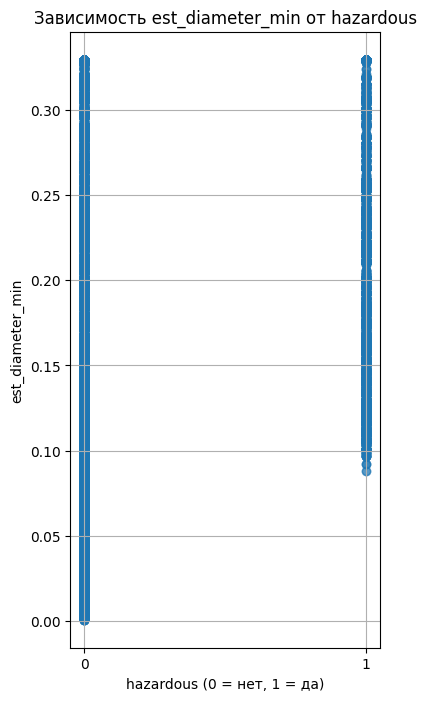

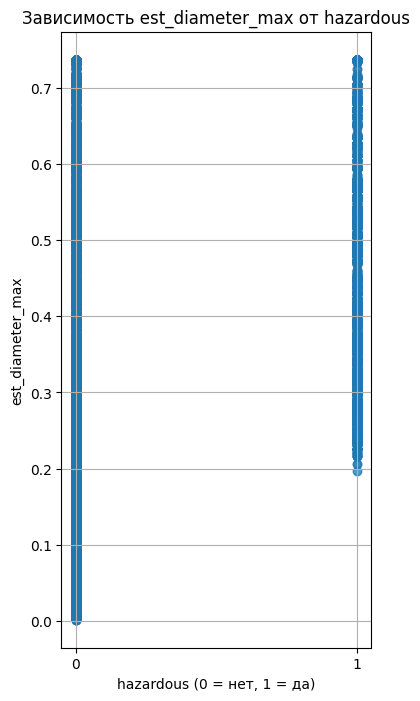

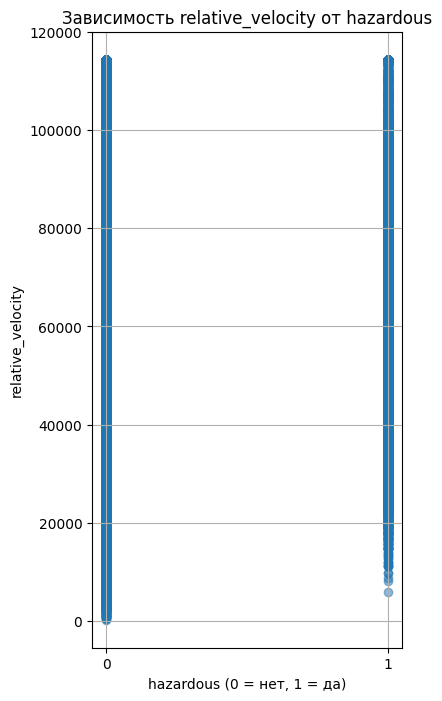

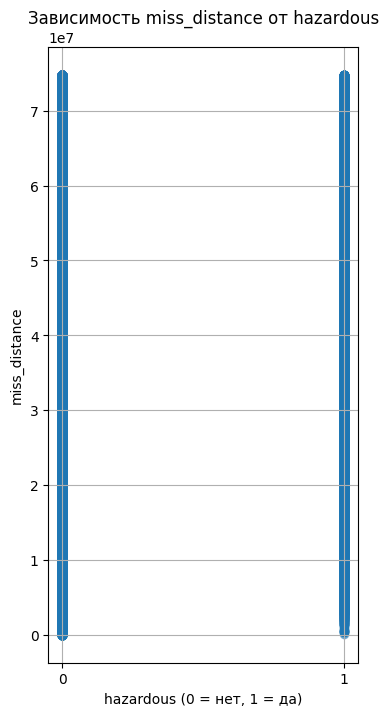

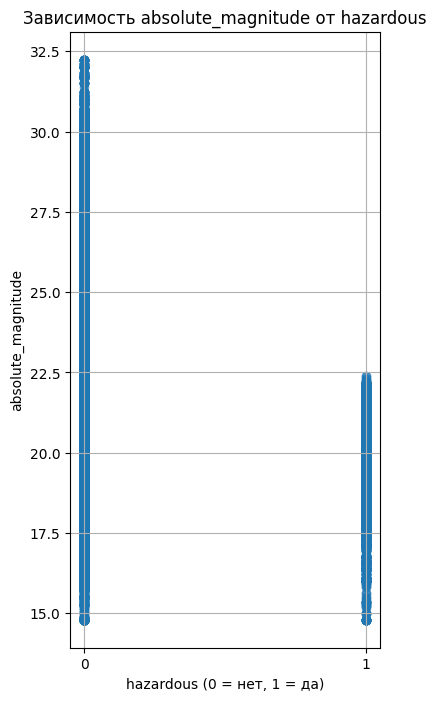

In [5]:
import matplotlib.pyplot as plt

# Список числовых колонок, для которых мы будем строить графики
numeric_columns = ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']

# Создание диаграмм зависимости
for column in numeric_columns:
    plt.figure(figsize=(4, 8))  # Установка размера графика
    plt.scatter(df['hazardous'], df[column], alpha=0.5)  # Создаем диаграмму рассеяния
    plt.title(f'Зависимость {column} от hazardous')
    plt.xlabel('hazardous (0 = нет, 1 = да)')
    plt.ylabel(column)
    plt.xticks([0, 1])  # Установка меток по оси X
    plt.grid()  # Добавление сетки для удобства восприятия
    plt.show()  # Отображение графика

Создадим выборки данных. разбивать будем относительно параметра опасный, ведь это тот самый параметр по которому наша выборка разбивается на классы. И собственно его нам и надо будет предсказывать

In [6]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Функция для создания выборок
from sklearn.model_selection import train_test_split

def split_stratified_into_train_val_test(
    df_input,
    stratify_colname="y",
    frac_train=0.6,
    frac_val=0.15,
    frac_test=0.25,
    random_state=None,
):
    """
    Splits a Pandas dataframe into three subsets (train, val, and test)
    following fractional ratios provided by the user, where each subset is
    stratified by the values in a specific column (that is, each subset has
    the same relative frequency of the values in the column). It performs this
    splitting by running train_test_split() twice.

    Parameters
    ----------
    df_input : Pandas dataframe
        Input dataframe to be split.
    stratify_colname : str
        The name of the column that will be used for stratification. Usually
        this column would be for the label.
    frac_train : float
    frac_val   : float
    frac_test  : float
        The ratios with which the dataframe will be split into train, val, and
        test data. The values should be expressed as float fractions and should
        sum to 1.0.
    random_state : int, None, or RandomStateInstance
        Value to be passed to train_test_split().

    Returns
    -------
    df_train, df_val, df_test :
        Dataframes containing the three splits.
    """

    if frac_train + frac_val + frac_test != 1.0:
        raise ValueError(
            "fractions %f, %f, %f do not add up to 1.0"
            % (frac_train, frac_val, frac_test)
        )

    if stratify_colname not in df_input.columns:
        raise ValueError("%s is not a column in the dataframe" % (stratify_colname))

    X = df_input  # Contains all columns.
    y = df_input[
        [stratify_colname]
    ]  # Dataframe of just the column on which to stratify.

    # Split original dataframe into train and temp dataframes.
    df_train, df_temp, y_train, y_temp = train_test_split(
        X, y, stratify=y, test_size=(1.0 - frac_train), random_state=random_state
    )

    # Split the temp dataframe into val and test dataframes.
    relative_frac_test = frac_test / (frac_val + frac_test)
    df_val, df_test, y_val, y_test = train_test_split(
        df_temp,
        y_temp,
        stratify=y_temp,
        test_size=relative_frac_test,
        random_state=random_state,
    )

    assert len(df_input) == len(df_train) + len(df_val) + len(df_test)

    return df_train, df_val, df_test

hazardous
False    81996
True      8840
Name: count, dtype: int64

Обучающая выборка:  (54501, 6)
hazardous
False    49197
True      5304
Name: count, dtype: int64


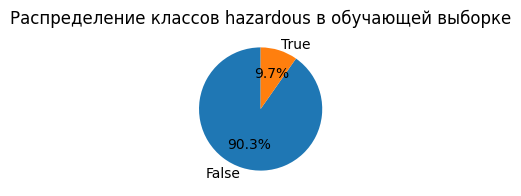

Контрольная выборка:  (18167, 6)
hazardous
False    16399
True      1768
Name: count, dtype: int64


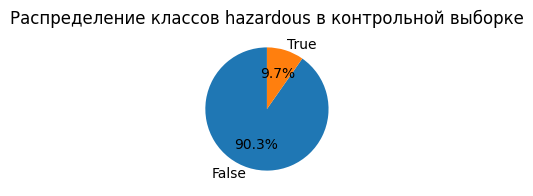

Тестовая выборка:  (18168, 6)
hazardous
False    16400
True      1768
Name: count, dtype: int64


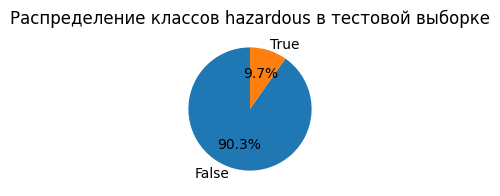

In [8]:
# Вывод распределения количества наблюдений по меткам (классам)
print(df.hazardous.value_counts())
print()


data = df[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude', 'hazardous']].copy()

df_train, df_val, df_test = split_stratified_into_train_val_test(
   data, stratify_colname="hazardous", frac_train=0.60, frac_val=0.20, frac_test=0.20
)

print("Обучающая выборка: ", df_train.shape)
print(df_train.hazardous.value_counts())
hazardous_counts = df_train['hazardous'].value_counts()
plt.figure(figsize=(2, 2))# Установка размера графика
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)# Построение круговой диаграммы
plt.title('Распределение классов hazardous в обучающей выборке')# Добавление заголовка
plt.show()# Отображение графика

print("Контрольная выборка: ", df_val.shape)
print(df_val.hazardous.value_counts())
hazardous_counts = df_val['hazardous'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов hazardous в контрольной выборке')
plt.show()

print("Тестовая выборка: ", df_test.shape)
print(df_test.hazardous.value_counts())
hazardous_counts = df_test['hazardous'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов hazardous в тестовой выборке')
plt.show()

распределение плохое, соотношение классов сильно смещено, это может привести к проблемам в обучении модели, так как модель будет обучаться в основном на одном классе. В таких случаях стоит рассмотреть методы аугментации данных.

аугментация данных оверсемплингом(Этот метод увеличивает количество примеров меньшинства)

In [9]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


Обучающая выборка после oversampling:  (100385, 6)
hazardous
True     51188
False    49197
Name: count, dtype: int64


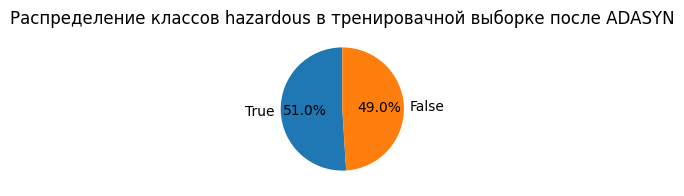

In [10]:
from imblearn.over_sampling import ADASYN

# Создание экземпляра ADASYN
ada = ADASYN()

# Применение ADASYN
X_resampled, y_resampled = ada.fit_resample(df_train.drop(columns=['hazardous']), df_train['hazardous'])

# Создание нового DataFrame
df_train_adasyn = pd.DataFrame(X_resampled)
df_train_adasyn['hazardous'] = y_resampled  # Добавление целевой переменной

# Вывод информации о новой выборке
print("Обучающая выборка после oversampling: ", df_train_adasyn.shape)
print(df_train_adasyn['hazardous'].value_counts())
hazardous_counts = df_train_adasyn['hazardous'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов hazardous в тренировачной выборке после ADASYN')
plt.show()

P.S. можно было использовать ещё SMOTE, SVM-SMOTE, K-means SMOTE, SMOTE-N, SMOTE-NC, RandomOverSampler.

проведём также балансировку данных методом андерсемплинга. Этот метод помогает сбалансировать выборку, уменьшая количество экземпляров класса большинства, чтобы привести его в соответствие с классом меньшинства.

Обучающая выборка после undersampling:  (10608, 6)
hazardous
False    5304
True     5304
Name: count, dtype: int64


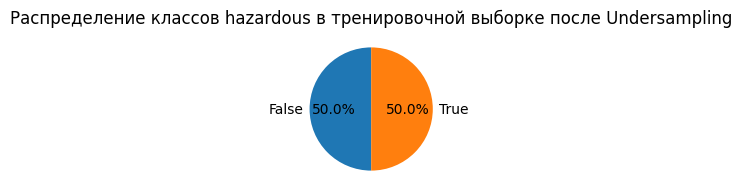

In [11]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()# Создание экземпляра RandomUnderSampler

# Применение RandomUnderSampler
X_resampled, y_resampled = rus.fit_resample(df_train.drop(columns=['hazardous']), df_train['hazardous'])

# Создание нового DataFrame
df_train_undersampled = pd.DataFrame(X_resampled)
df_train_undersampled['hazardous'] = y_resampled  # Добавление целевой переменной

# Вывод информации о новой выборке
print("Обучающая выборка после undersampling: ", df_train_undersampled.shape)
print(df_train_undersampled['hazardous'].value_counts())

# Визуализация распределения классов
hazardous_counts = df_train_undersampled['hazardous'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(hazardous_counts, labels=hazardous_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов hazardous в тренировочной выборке после Undersampling')
plt.show()

# 2 Датасет: Pima Indians Diabetes Database
#### https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Этот набор данных изначально был получен из Национального института диабета, заболеваний пищеварительной системы и почек. Целью набора данных является диагностическое прогнозирование наличия или отсутствия у пациента диабета на основе определенных диагностических измерений, включенных в набор данных. На выбор этих случаев из более крупной базы данных налагалось несколько ограничений. В частности, все пациенты здесь — женщины в возрасте не менее 21 года индейского происхождения пима.

- объект иследования - женьщины индейци пима
- очевидно цель датасета это предсказание диабета.
- атрибуты: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome

In [12]:
df = pd.read_csv("..//static//csv//diabetes.csv", sep=",")
print('количество колонок: ' + str(df.columns.size))  
print('колонки: ' + ', '.join(df.columns))

количество колонок: 9
колонки: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome


Получение сведений о пропущенных данных

Типы пропущенных данных:
- None - представление пустых данных в Python
- NaN - представление пустых данных в Pandas
- '' - пустая строка

In [13]:
# Количество пустых значений признаков
print(df.isnull().sum())

print()

# Есть ли пустые значения признаков
print(df.isnull().any())

print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool



Итог: пропущеных значений нет

посмотрим выбросы и усредним их:

In [14]:
numeric_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for column in numeric_columns:
    if pd.api.types.is_numeric_dtype(df[column]):  # Проверяем, является ли колонка числовой
        q1 = df[column].quantile(0.25)  # Находим 1-й квартиль (Q1)
        q3 = df[column].quantile(0.75)  # Находим 3-й квартиль (Q3)
        iqr = q3 - q1  # Вычисляем межквартильный размах (IQR)

        # Определяем границы для выбросов
        lower_bound = q1 - 1.5 * iqr  # Нижняя граница
        upper_bound = q3 + 1.5 * iqr  # Верхняя граница

        # Подсчитываем количество выбросов
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count = outliers.shape[0]

        # Устраняем выбросы: заменяем значения ниже нижней границы на саму нижнюю границу, а выше верхней — на верхнюю
        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

        print(f"Колонка {column}:")
        print(f"  Есть выбросы: {'Да' if outlier_count > 0 else 'Нет'}")
        print(f"  Количество выбросов: {outlier_count}")
        print(f"  Минимальное значение: {df[column].min()}")
        print(f"  Максимальное значение: {df[column].max()}")
        print(f"  1-й квартиль (Q1): {q1}")
        print(f"  3-й квартиль (Q3): {q3}\n")

Колонка Pregnancies:
  Есть выбросы: Да
  Количество выбросов: 4
  Минимальное значение: 0.0
  Максимальное значение: 13.5
  1-й квартиль (Q1): 1.0
  3-й квартиль (Q3): 6.0

Колонка Glucose:
  Есть выбросы: Да
  Количество выбросов: 5
  Минимальное значение: 37.125
  Максимальное значение: 199.0
  1-й квартиль (Q1): 99.0
  3-й квартиль (Q3): 140.25

Колонка BloodPressure:
  Есть выбросы: Да
  Количество выбросов: 45
  Минимальное значение: 35.0
  Максимальное значение: 107.0
  1-й квартиль (Q1): 62.0
  3-й квартиль (Q3): 80.0

Колонка SkinThickness:
  Есть выбросы: Да
  Количество выбросов: 1
  Минимальное значение: 0.0
  Максимальное значение: 80.0
  1-й квартиль (Q1): 0.0
  3-й квартиль (Q3): 32.0

Колонка Insulin:
  Есть выбросы: Да
  Количество выбросов: 34
  Минимальное значение: 0.0
  Максимальное значение: 318.125
  1-й квартиль (Q1): 0.0
  3-й квартиль (Q3): 127.25

Колонка BMI:
  Есть выбросы: Да
  Количество выбросов: 19
  Минимальное значение: 13.35
  Максимальное значение: 

построим графики в надежде найти какие то зависимости опасности от других колонок

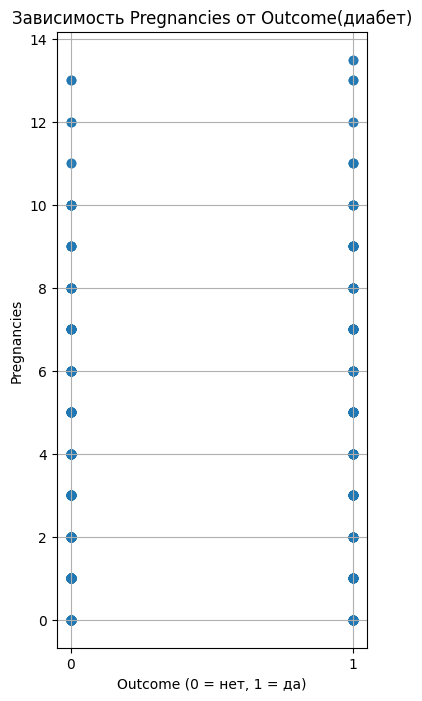

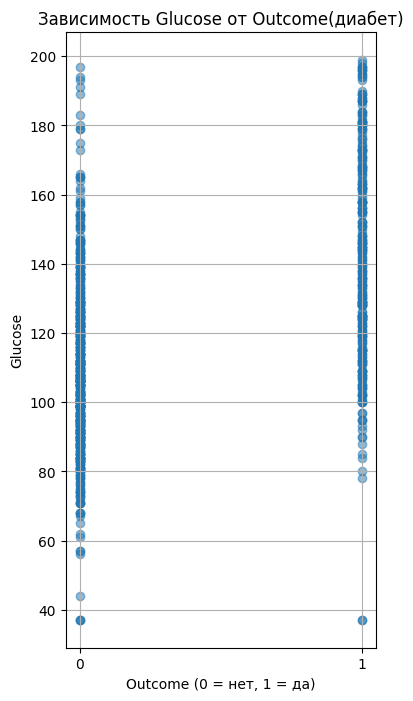

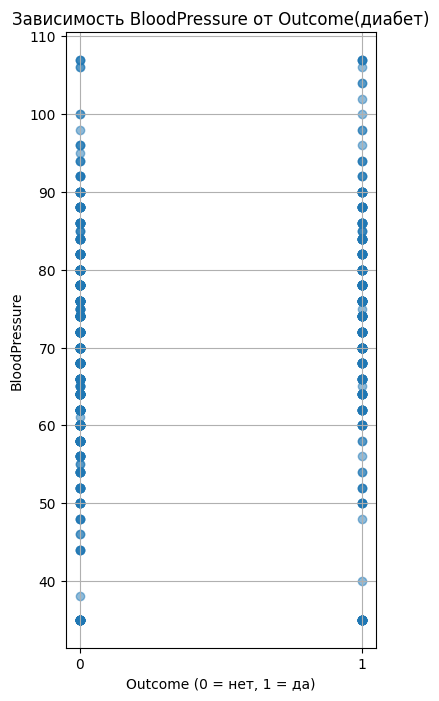

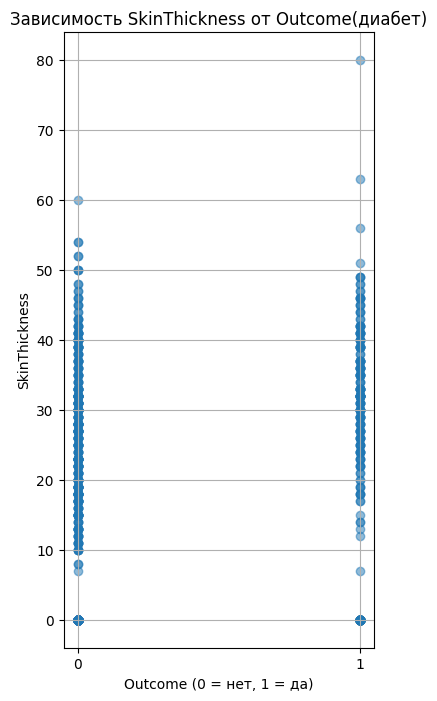

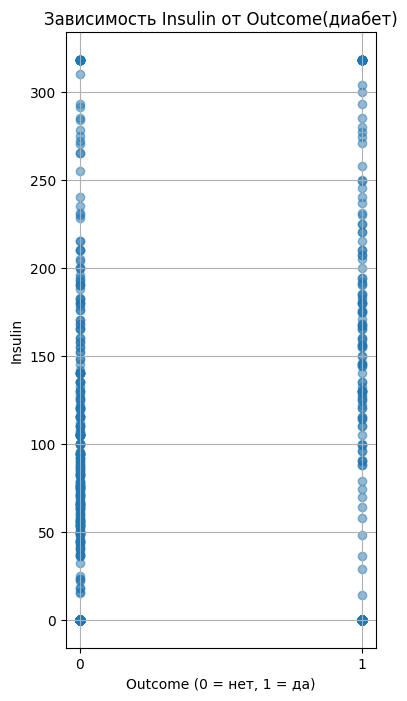

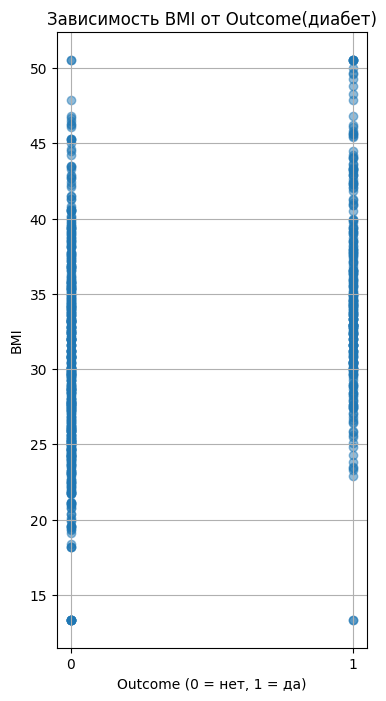

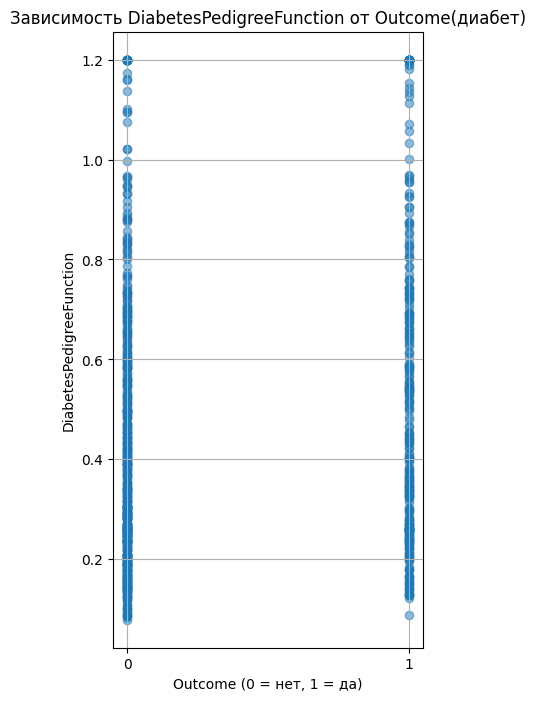

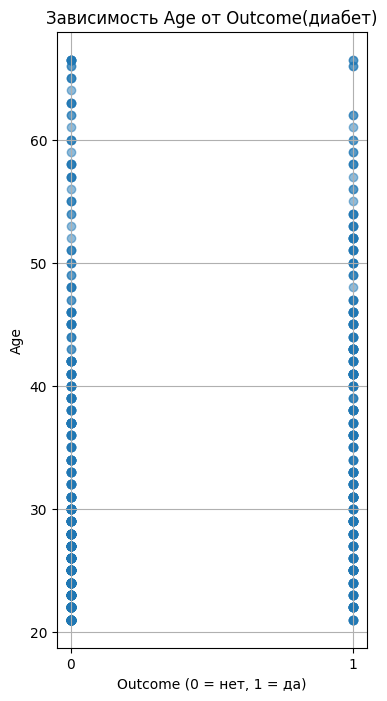

In [15]:
# Создание диаграмм зависимости
for column in numeric_columns:
    plt.figure(figsize=(4, 8))  # Установка размера графика
    plt.scatter(df['Outcome'], df[column], alpha=0.5)  # Создаем диаграмму рассеяния
    plt.title(f'Зависимость {column} от Outcome(диабет)')
    plt.xlabel('Outcome (0 = нет, 1 = да)')
    plt.ylabel(column)
    plt.xticks([0, 1])  # Установка меток по оси X
    plt.grid()  # Добавление сетки для удобства восприятия
    plt.show()  # Отображение графика

Создадим выборки данных. разбивать будем относительно параметра Outcome, ведь это тот самый параметр по которому наша выборка разбивается на классы. И собственно его нам и надо будет предсказывать

Outcome
0    500
1    268
Name: count, dtype: int64

Обучающая выборка:  (460, 9)
Outcome
0    299
1    161
Name: count, dtype: int64


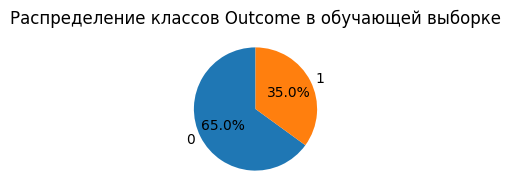

Контрольная выборка:  (154, 9)
Outcome
0    101
1     53
Name: count, dtype: int64


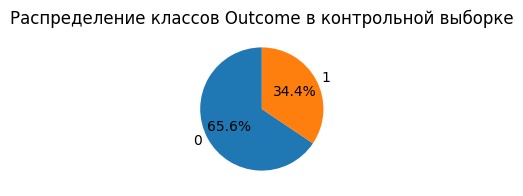

Тестовая выборка:  (154, 9)
Outcome
0    100
1     54
Name: count, dtype: int64


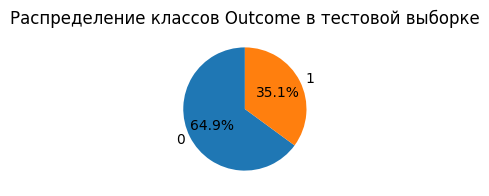

In [16]:
# Вывод распределения количества наблюдений по меткам (классам)
print(df.Outcome.value_counts())
print()

data = df.copy()

df_train, df_val, df_test = split_stratified_into_train_val_test(
   data, stratify_colname="Outcome", frac_train=0.60, frac_val=0.20, frac_test=0.20
)

print("Обучающая выборка: ", df_train.shape)
print(df_train.Outcome.value_counts())
counts = df_train['Outcome'].value_counts()
plt.figure(figsize=(2, 2))# Установка размера графика
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)# Построение круговой диаграммы
plt.title('Распределение классов Outcome в обучающей выборке')# Добавление заголовка
plt.show()# Отображение графика

print("Контрольная выборка: ", df_val.shape)
print(df_val.Outcome.value_counts())
counts = df_val['Outcome'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов Outcome в контрольной выборке')
plt.show()

print("Тестовая выборка: ", df_test.shape)
print(df_test.Outcome.value_counts())
counts = df_test['Outcome'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов Outcome в тестовой выборке')
plt.show()

распределение неплохое но могло бы быть лучше. Поэтому применим балансировку 

аугментация данных оверсемплингом(Этот метод увеличивает количество примеров меньшинства)

Обучающая выборка после oversampling:  (579, 9)
Outcome
0    299
1    280
Name: count, dtype: int64


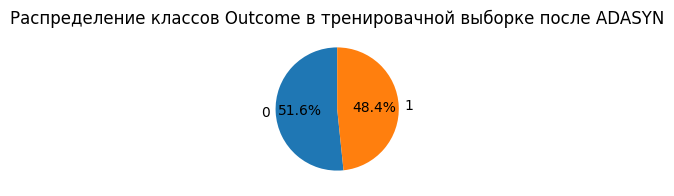

In [17]:
# Применение ADASYN
X_resampled, y_resampled = ada.fit_resample(df_train.drop(columns=['Outcome']), df_train['Outcome'])

# Создание нового DataFrame
df_train_adasyn = pd.DataFrame(X_resampled)
df_train_adasyn['Outcome'] = y_resampled  # Добавление целевой переменной

# Вывод информации о новой выборке
print("Обучающая выборка после oversampling: ", df_train_adasyn.shape)
print(df_train_adasyn['Outcome'].value_counts())
counts = df_train_adasyn['Outcome'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов Outcome в тренировачной выборке после ADASYN')
plt.show()

проведём также балансировку данных методом андерсемплинга. Этот метод помогает сбалансировать выборку, уменьшая количество экземпляров класса большинства, чтобы привести его в соответствие с классом меньшинства.

Обучающая выборка после undersampling:  (322, 9)
Outcome
0    161
1    161
Name: count, dtype: int64


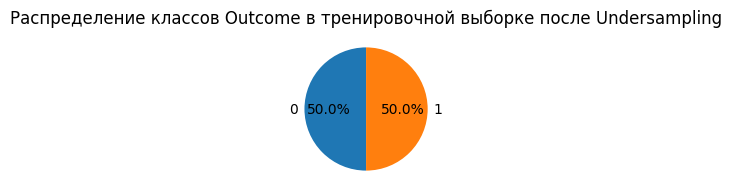

In [18]:
# Применение RandomUnderSampler
X_resampled, y_resampled = rus.fit_resample(df_train.drop(columns=['Outcome']), df_train['Outcome'])

# Создание нового DataFrame
df_train_undersampled = pd.DataFrame(X_resampled)
df_train_undersampled['Outcome'] = y_resampled  # Добавление целевой переменной

# Вывод информации о новой выборке
print("Обучающая выборка после undersampling: ", df_train_undersampled.shape)
print(df_train_undersampled['Outcome'].value_counts())

# Визуализация распределения классов
counts = df_train_undersampled['Outcome'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов Outcome в тренировочной выборке после Undersampling')
plt.show()

# 3 Датасет: Stroke Prediction Dataset
#### https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

- Из этого описания очевидно что объектами иследования являются реальные пациенты.
- Атрибуты объектов: id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke
- Очевидная цель этого датасета - это научиться определять будет у человека сердечный приступ или нет.

In [19]:
import pandas as pd
df = pd.read_csv("..//static//csv//healthcare-dataset-stroke-data.csv", sep=",")
print('количество колонок: ' + str(df.columns.size))  
print('колонки: ' + ', '.join(df.columns))

количество колонок: 12
колонки: id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke


Получение сведений о пропущенных данных

Типы пропущенных данных:
- None - представление пустых данных в Python
- NaN - представление пустых данных в Pandas
- '' - пустая строка

In [20]:
import numpy as np
# Замена значений 'Unknown' на np.nan
df.replace('Unknown', np.nan, inplace=True)

# Количество пустых значений признаков
print(df.isnull().sum())
print()

# Есть ли пустые значения признаков
print(df.isnull().any())
print()

# Процент пустых значений признаков
for i in df.columns:
    null_rate = df[i].isnull().sum() / len(df) * 100
    if null_rate > 0:
        print(f"{i} процент пустых значений: %{null_rate:.2f}")

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status        True
stroke               False
dtype: bool

bmi процент пустых значений: %3.93
smoking_status процент пустых значений: %30.22


пропуски есть и их не мало, с нимим можно поступить 2 способами, удалить записи или достроить эти пропуски

- Удаление наблюдений с пропусками

In [21]:
dropna_df = df.dropna()
print(dropna_df.shape)
print(dropna_df.isnull().any())

(3426, 12)
id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool


срезалось ~2000 записей, что не круто когда записей всего ~5000.
- Попробуем дополнить базу данных заполнив пропуски

In [22]:
print(df['smoking_status'].unique())
# Замена пустых данных на медиану
df["bmi"] = df["bmi"].fillna(df["bmi"].median())

# Заполнение с помощью модели машинного обучения
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Определение категориальных и числовых столбцов
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type']  
numeric_features = ['avg_glucose_level', 'hypertension', 'heart_disease', 'age', 'bmi']

from sklearn.preprocessing import StandardScaler

# Добавляем StandardScaler для числовых признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ('num', StandardScaler(), numeric_features)  # Применение скейлера к числовым признакам
    ],
    remainder='passthrough'
)

# Создание пайплайна для обучения модели
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Разделение данных на обучающую выборку и тестовую, исключая smoking_status = 0 из обучающей выборки
known_smoking_status = df.dropna()  # только те строки, где smoking_status != 0
unknown_smoking_status = df[df['smoking_status'].isnull()]  # строки с smoking_status = 0 для предсказания

# Определяем признаки для обучения (категориальные и числовые)
X_train = known_smoking_status[categorical_features + numeric_features]
y_train = known_smoking_status['smoking_status']

# Данные для предсказания
X_test = unknown_smoking_status[categorical_features + numeric_features]

# Обучение модели через пайплайн
pipeline.fit(X_train, y_train)

# Предсказание пропущенных значений
df.loc[df['smoking_status'].isnull(), 'smoking_status'] = pipeline.predict(X_test)

# Количество пустых значений признаков
print(df.isnull().sum())
print()

# Есть ли пустые значения признаков
print(df.isnull().any())
print()
print(df['smoking_status'].unique())

['formerly smoked' 'never smoked' 'smokes' nan]
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

['formerly smoked' 'never smoked' 'smokes']


посмотрим выбросы и усредним их:

In [23]:
numeric_columns = ['age', 'avg_glucose_level', 'bmi']
for column in numeric_columns:
    if pd.api.types.is_numeric_dtype(df[column]):  # Проверяем, является ли колонка числовой
        q1 = df[column].quantile(0.25)  # Находим 1-й квартиль (Q1)
        q3 = df[column].quantile(0.75)  # Находим 3-й квартиль (Q3)
        iqr = q3 - q1  # Вычисляем межквартильный размах (IQR)

        # Определяем границы для выбросов
        lower_bound = q1 - 1.5 * iqr  # Нижняя граница
        upper_bound = q3 + 1.5 * iqr  # Верхняя граница

        # Подсчитываем количество выбросов
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count = outliers.shape[0]
        
        # Устраняем выбросы: заменяем значения ниже нижней границы на саму нижнюю границу, а выше верхней — на верхнюю
        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

        print(f"Колонка {column}:")
        print(f"  Есть выбросы: {'Да' if outlier_count > 0 else 'Нет'}")
        print(f"  Количество выбросов: {outlier_count}")
        print(f"  Минимальное значение: {df[column].min()}")
        print(f"  Максимальное значение: {df[column].max()}")
        print(f"  1-й квартиль (Q1): {q1}")
        print(f"  3-й квартиль (Q3): {q3}\n")


Колонка age:
  Есть выбросы: Нет
  Количество выбросов: 0
  Минимальное значение: 0.08
  Максимальное значение: 82.0
  1-й квартиль (Q1): 25.0
  3-й квартиль (Q3): 61.0

Колонка avg_glucose_level:
  Есть выбросы: Да
  Количество выбросов: 627
  Минимальное значение: 55.12
  Максимальное значение: 169.35750000000002
  1-й квартиль (Q1): 77.245
  3-й квартиль (Q3): 114.09

Колонка bmi:
  Есть выбросы: Да
  Количество выбросов: 126
  Минимальное значение: 10.300000000000006
  Максимальное значение: 46.29999999999999
  1-й квартиль (Q1): 23.8
  3-й квартиль (Q3): 32.8



построим графики в надежде найти какие то зависимости инсульта от других колонок

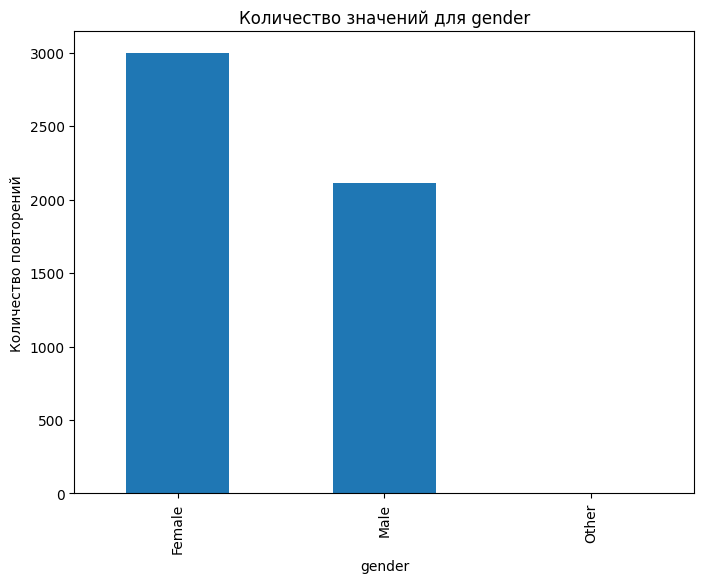

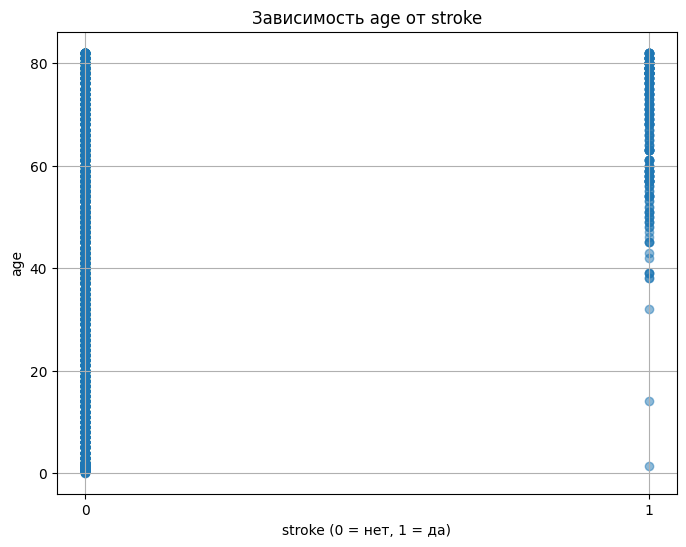

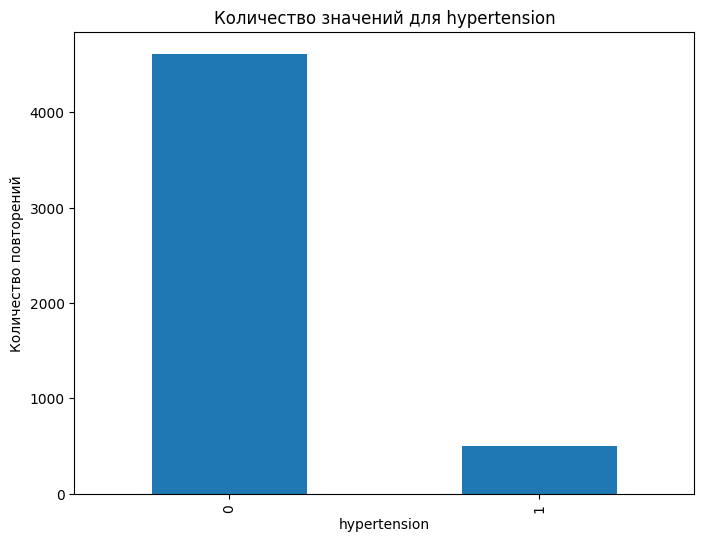

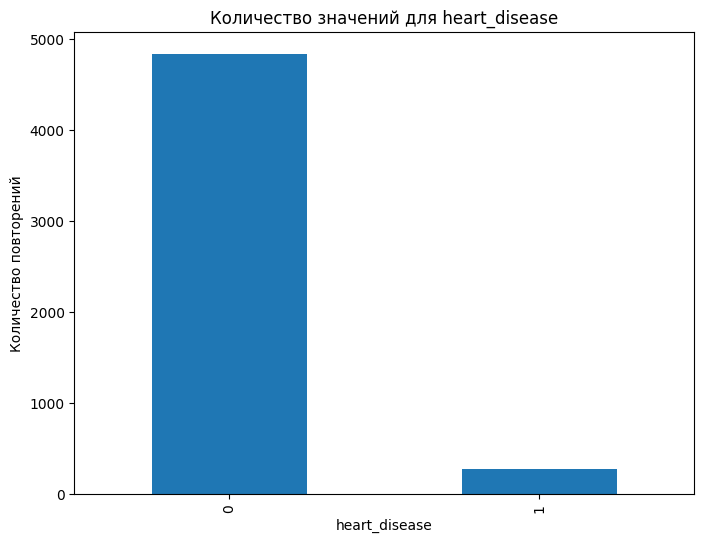

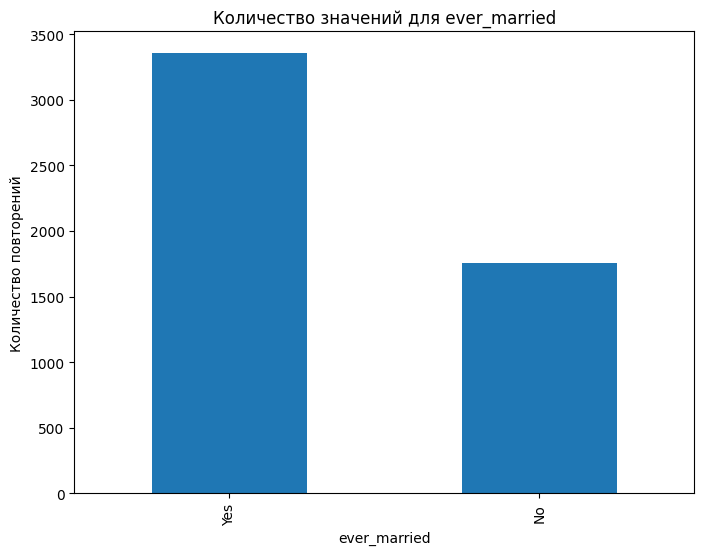

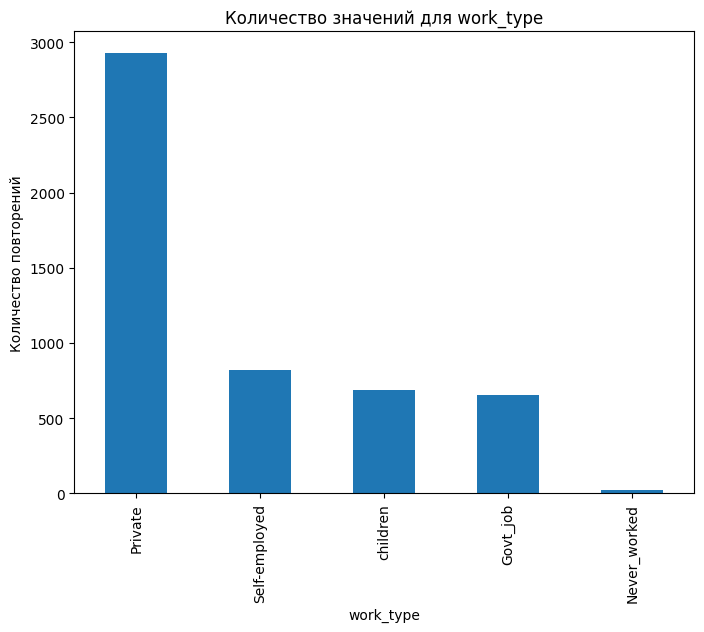

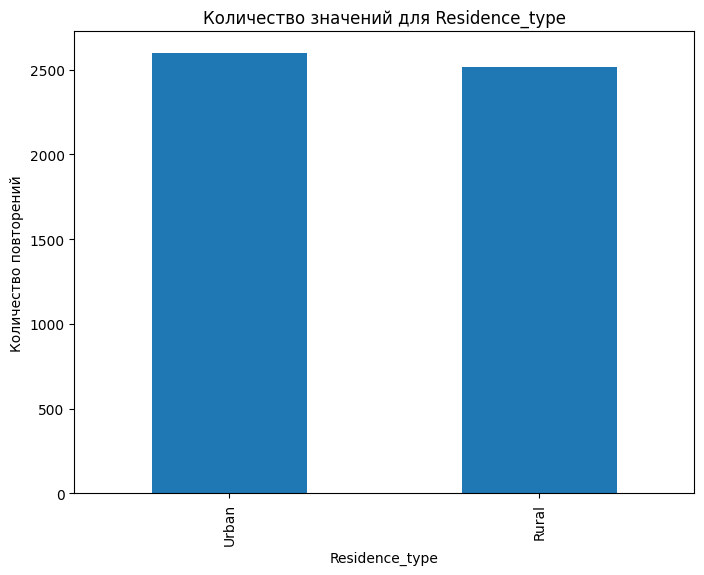

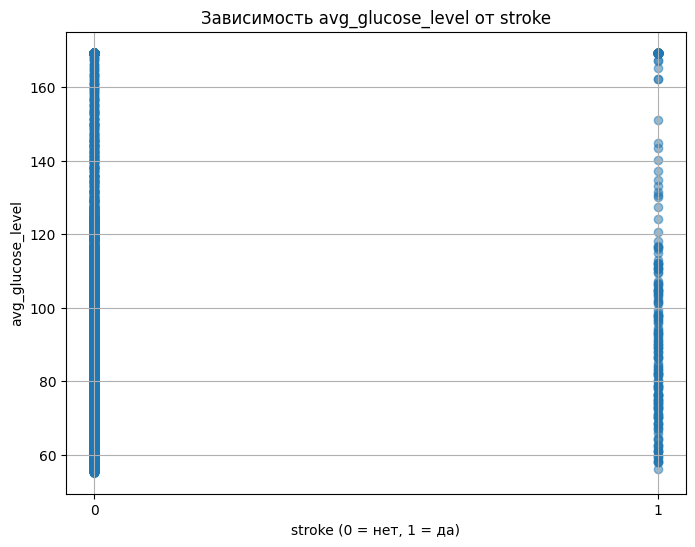

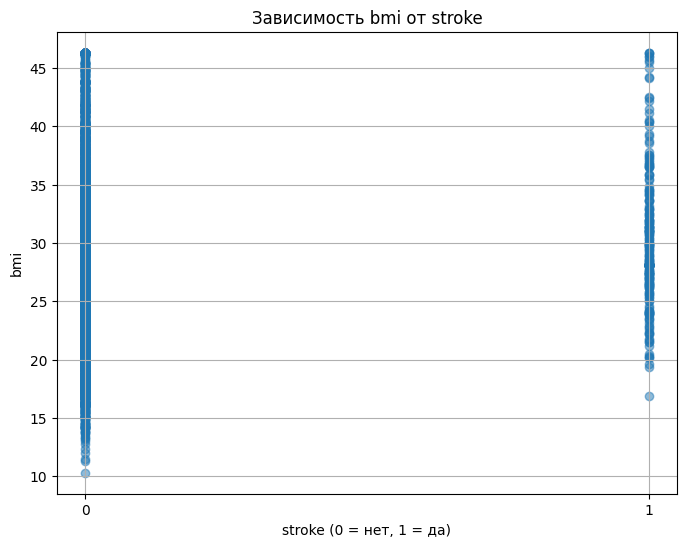

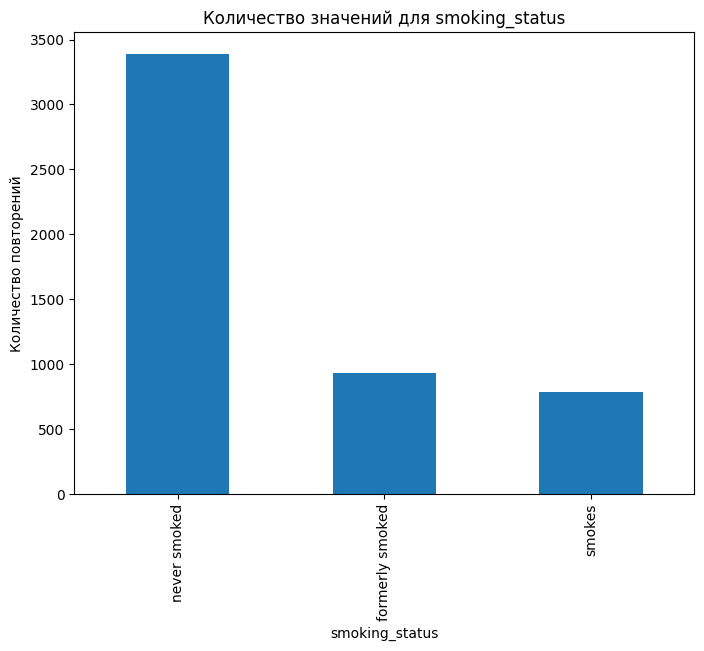

In [31]:
# Список колонок для построения графиков
columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
           'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
           'smoking_status']

# Создание диаграмм зависимости
for column in columns:
    plt.figure(figsize=(8, 6))  # Установка размера графика
    if pd.api.types.is_numeric_dtype(df[column]):  # Проверяем, является ли колонка числовой
        # Проверяем, содержит ли колонка только два уникальных значения (0 и 1)
        if df[column].nunique() == 2 and set(df[column].unique()).issubset({0, 1}):
            # Если да, то строим столбчатую диаграмму
            counts = df[column].value_counts()  # Считаем количество повторений каждого значения
            counts.plot(kind='bar')  # Создаем столбчатую диаграмму
            plt.title(f'Количество значений для {column}')
            plt.xlabel(column)
            plt.ylabel('Количество повторений')
        else:
            # Если колонка числовая, создаем диаграмму рассеяния
            plt.scatter(df['stroke'], df[column], alpha=0.5)  # Создаем диаграмму рассеяния
            plt.title(f'Зависимость {column} от stroke')
            plt.xlabel('stroke (0 = нет, 1 = да)')
            plt.ylabel(column)
            plt.xticks([0, 1])  # Установка меток по оси X
            plt.grid()  # Добавление сетки для удобства восприятия
    else:
        # Если колонка не числовая, строим столбчатую диаграмму
        counts = df[column].value_counts()  # Считаем количество повторений каждого значения
        counts.plot(kind='bar')  # Создаем столбчатую диаграмму
        plt.title(f'Количество значений для {column}')
        plt.xlabel(column)
        plt.ylabel('Количество повторений')

    plt.show()  # Отображение графика

Создадим выборки данных. разбивать будем относительно параметра инсульта, ведь это тот самый параметр по которому наша выборка разбивается на классы. И собственно его нам и надо будет предсказывать

stroke
0    4861
1     249
Name: count, dtype: int64

Обучающая выборка:  (3066, 12)
stroke
0    2917
1     149
Name: count, dtype: int64


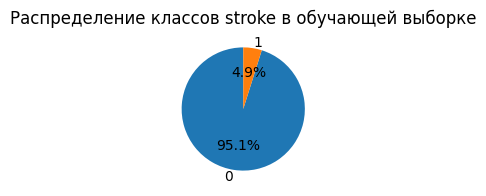

Контрольная выборка:  (1022, 12)
stroke
0    972
1     50
Name: count, dtype: int64


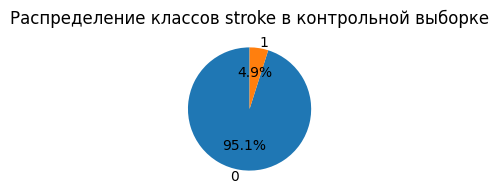

Тестовая выборка:  (1022, 12)
stroke
0    972
1     50
Name: count, dtype: int64


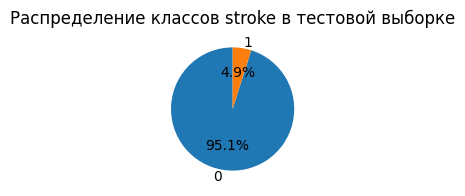

In [32]:
# Вывод распределения количества наблюдений по меткам (классам)
print(df.stroke.value_counts())
print()

data = df.copy()

df_train, df_val, df_test = split_stratified_into_train_val_test(
   data, stratify_colname="stroke", frac_train=0.60, frac_val=0.20, frac_test=0.20
)

print("Обучающая выборка: ", df_train.shape)
print(df_train.stroke.value_counts())
counts = df_train['stroke'].value_counts()
plt.figure(figsize=(2, 2))# Установка размера графика
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)# Построение круговой диаграммы
plt.title('Распределение классов stroke в обучающей выборке')# Добавление заголовка
plt.show()# Отображение графика

print("Контрольная выборка: ", df_val.shape)
print(df_val.stroke.value_counts())
counts = df_val['stroke'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов stroke в контрольной выборке')
plt.show()

print("Тестовая выборка: ", df_test.shape)
print(df_test.stroke.value_counts())
counts = df_test['stroke'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов stroke в тестовой выборке')
plt.show()

плохое распределение, надо сбалансировать

аугментация данных оверсемплингом(Этот метод увеличивает количество примеров меньшинства)

Обучающая выборка после oversampling:  (5831, 17)
stroke
0    2917
1    2914
Name: count, dtype: int64


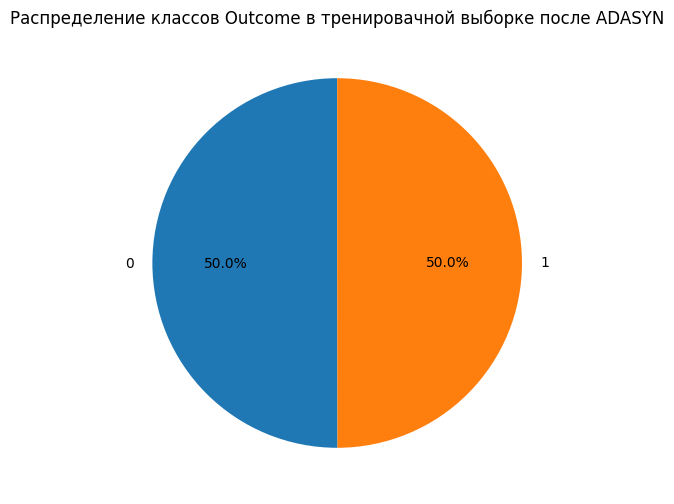

In [34]:
categorical_features = ['gender', 'ever_married', 'work_type', 'Residence_type']  # Ваши категориальные признаки
numeric_features = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']  # Ваши числовые признаки

# Создание пайплайна для обработки категориальных данных
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),  # OneHotEncoder для категориальных данных
        ('num', 'passthrough', numeric_features)  # Оставляем числовые колонки без изменений
    ]
)

# Создание экземпляра ADASYN
ada = ADASYN()

# Преобразование данных с помощью пайплайна
X = preprocessor.fit_transform(df_train.drop(columns=['stroke']))
y = df_train['stroke']

# Применение ADASYN
X_resampled, y_resampled = ada.fit_resample(X, y)

# Создание нового DataFrame
df_train_adasyn = pd.DataFrame(X_resampled)
# Восстанавливаем названия столбцов для DataFrame
ohe_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
new_column_names = list(ohe_columns) + numeric_features
df_train_adasyn.columns = new_column_names

# Добавление целевой переменной
df_train_adasyn['stroke'] = y_resampled

# Вывод информации о новой выборке
print("Обучающая выборка после oversampling: ", df_train_adasyn.shape)
print(df_train_adasyn['stroke'].value_counts())

# Визуализация
counts = df_train_adasyn['stroke'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов Outcome в тренировачной выборке после ADASYN')
plt.show()

проведём также балансировку данных методом андерсемплинга. Этот метод помогает сбалансировать выборку, уменьшая количество экземпляров класса большинства, чтобы привести его в соответствие с классом меньшинства.

Обучающая выборка после undersampling:  (298, 12)
stroke
0    149
1    149
Name: count, dtype: int64


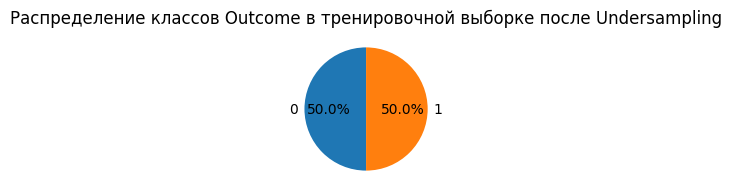

array(['Male', 'Female'], dtype=object)

In [37]:
# Применение RandomUnderSampler
X_resampled, y_resampled = rus.fit_resample(df_train.drop(columns=['stroke']), df_train['stroke'])

# Создание нового DataFrame
df_train_undersampled = pd.DataFrame(X_resampled)
df_train_undersampled['stroke'] = y_resampled  # Добавление целевой переменной

# Вывод информации о новой выборке
print("Обучающая выборка после undersampling: ", df_train_undersampled.shape)
print(df_train_undersampled['stroke'].value_counts())

# Визуализация распределения классов
counts = df_train_undersampled['stroke'].value_counts()
plt.figure(figsize=(2, 2))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение классов Outcome в тренировочной выборке после Undersampling')
plt.show()